In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

df = pd.DataFrame(pd.read_csv('spotifytoptracks.csv', index_col=0))
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            50 non-null     object 
 1   album             50 non-null     object 
 2   track_name        50 non-null     object 
 3   track_id          50 non-null     object 
 4   energy            50 non-null     float64
 5   danceability      50 non-null     float64
 6   key               50 non-null     int64  
 7   loudness          50 non-null     float64
 8   acousticness      50 non-null     float64
 9   speechiness       50 non-null     float64
 10  instrumentalness  50 non-null     float64
 11  liveness          50 non-null     float64
 12  valence           50 non-null     float64
 13  tempo             50 non-null     float64
 14  duration_ms       50 non-null     int64  
 15  genre             50 non-null     object 
dtypes: float64(9), int64(2), object(5)
memory usage: 6.

From given metadata we also know that some values can be 0, so there's no need to fill the data. 

In [4]:
duplicates = df.duplicated()
df_no_duplicates = df.drop_duplicates()
print(f"Data Set with duplicate rows lengh is {len(df)} rows")
print(f"Data Set without duplicate rows lengh is {len(df_no_duplicates)} rows")
print(f"Data Set with duplicate columns - {len(df.transpose())}")
print(f"Data Set without duplicate columns - {len(df.transpose().drop_duplicates())}")

Data Set with duplicate rows lengh is 50 rows
Data Set without duplicate rows lengh is 50 rows
Data Set with duplicate columns - 16
Data Set without duplicate columns - 16


Double checking if there are any duplicate rows or columns 

In [5]:
df.describe()

,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.609300,0.716720,5.720000,-6.225900,0.256206,0.124158,0.015962,0.196552,0.555710,119.690460,199955.360000
std,0.154348,0.124975,3.709007,2.349744,0.265250,0.116836,0.094312,0.176610,0.216386,25.414778,33996.122488
min,0.225000,0.351000,0.000000,-14.454000,0.001460,0.029000,0.000000,0.057400,0.060500,75.801000,140526.000000
25%,0.494000,0.672500,2.000000,-7.552500,0.052800,0.048325,0.000000,0.093950,0.434000,99.557250,175845.500000
50%,0.597000,0.746000,6.500000,-5.991500,0.188500,0.070050,0.000000,0.111000,0.560000,116.969000,197853.500000
75%,0.729750,0.794500,8.750000,-4.285500,0.298750,0.155500,0.000020,0.271250,0.726250,132.317000,215064.000000
max,0.855000,0.935000,11.000000,-3.280000,0.934000,0.487000,0.657000,0.792000,0.925000,180.067000,312820.000000


Checking the overall view of the data if there are any abnormalities that could raise suspicion to incorect data. 

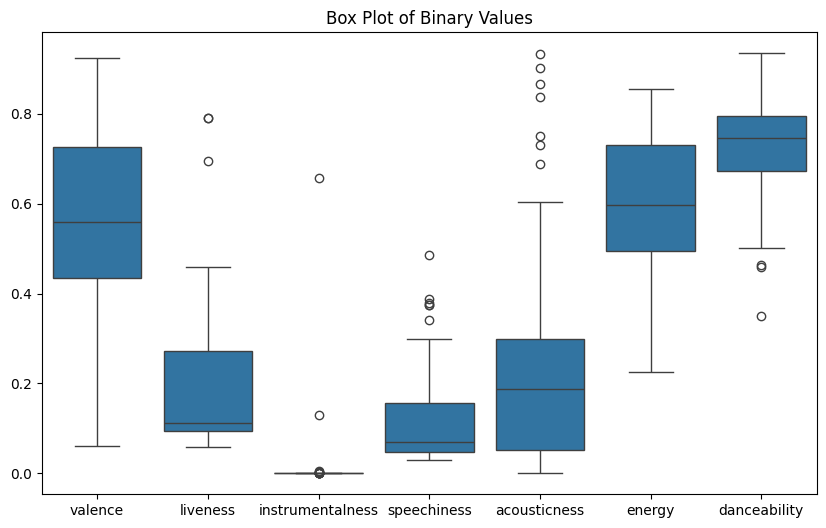

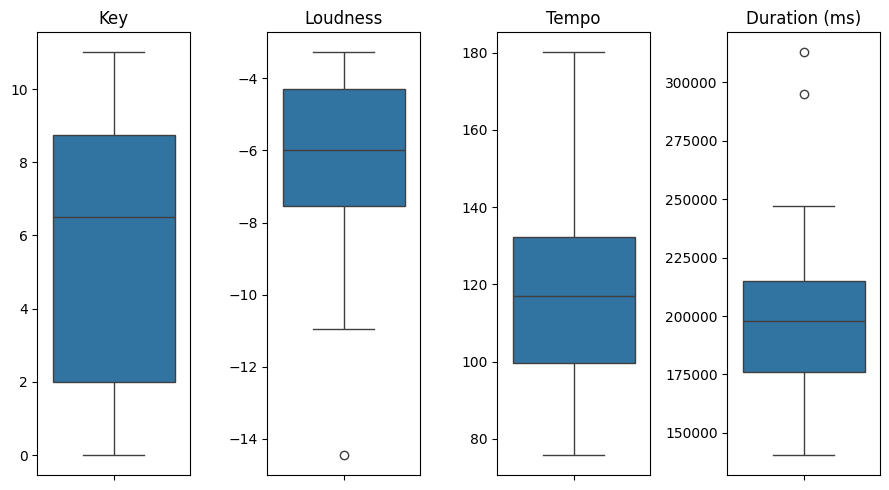

In [6]:
df_melted = pd.melt(df, value_vars=['valence', 'liveness', 'instrumentalness', 'speechiness', 'acousticness', 'energy', 'danceability'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted).set(xlabel = '', ylabel='')
plt.title('Box Plot of Binary Values') 
plt.show()

fig, axes = plt.subplots(1, 4, figsize=(9, 5))
sns.boxplot(y=df['key'], ax=axes[0])
axes[0].set_title('Key')
axes[0].set_ylabel('') 

sns.boxplot(y=df['loudness'], ax=axes[1])
axes[1].set_title('Loudness')
axes[1].set_ylabel('') 

sns.boxplot(y=df['tempo'], ax=axes[2])
axes[2].set_title('Tempo')
axes[2].set_ylabel('') 

sns.boxplot(y=df['duration_ms'], ax=axes[3])
axes[3].set_title('Duration (ms)')
axes[3].set_ylabel('') 

plt.tight_layout()

# Show the plot
plt.show()

 As we can see in columns: valence, liveness, spechiness, acousticness, energy, danceability the value ranges from 0 to 1, so we melt them in to a single box plot and the rest is visualized separately

In [7]:
def cap_outliers(df, columns, lower_percentile=0.06, upper_percentile=0.87):
    for column in columns:
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

columns_to_cap = ['acousticness','speechiness','liveness','danceability']

new_df = df

df_no_outliers = cap_outliers(new_df, columns_to_cap)

All of these melted columns have a certain value that could be debatable. Since it's unclear and there were many values that were considered outliers I took the liberty of capping them to the upper or lower percentile value. 

Instrumentallness was left unchanged, since there's only one song with such high instrumentallness value in the top 50 and it is an interesting observation itself. 

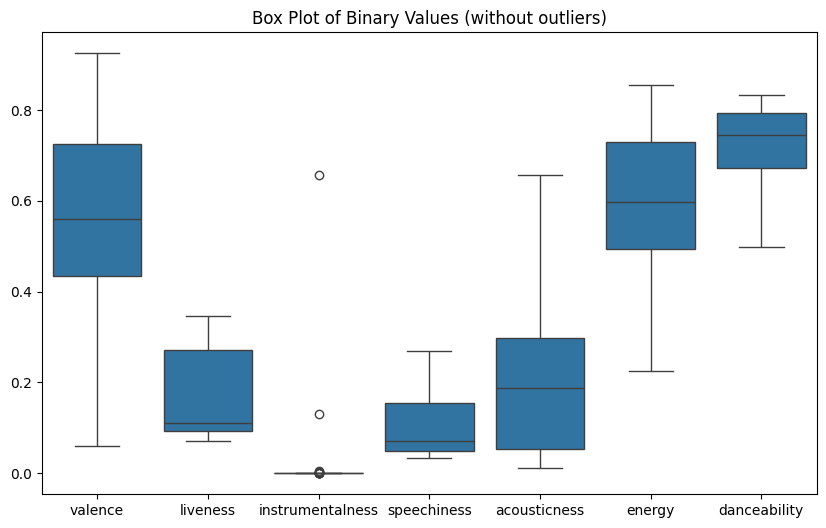

In [8]:
df_melted = pd.melt(df_no_outliers, value_vars=['valence', 'liveness', 'instrumentalness', 'speechiness', 'acousticness', 'energy', 'danceability'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_melted).set(xlabel = '', ylabel='')
plt.title('Box Plot of Binary Values (without outliers)') 
plt.show()

Checking how capping outliers changed the box plots

In [9]:
cat_feat = df.select_dtypes(include=['object']).columns.tolist()
output_cat = ", ".join(cat_feat)

num_feat = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
output_num = ', '.join(num_feat)

print(f"Categorical Features: {len(cat_feat)} \n{output_cat}")
print(f"Numeric Features: {len(num_feat)}\n{output_num}")


Categorical Features: 5 
artist, album, track_name, track_id, genre
Numeric Features: 11
energy, danceability, key, loudness, acousticness, speechiness, instrumentalness, liveness, valence, tempo, duration_ms


Checking how many features are numeric and categorical. 

In [10]:
artist_track_counts = df.groupby('artist')['track_name'].count()

popular_artists = artist_track_counts[artist_track_counts > 1].sort_values(ascending=False)


if len(popular_artists) > 0:
    print("Artists with more than one popular track:\n")
    for artist, track_count in popular_artists.items():
        print(f"{artist}: {track_count} tracks")
else:
    print("There are no artists with more than one popular track.")

unique_artists = df['artist'].unique()
print(f"\nUnique Artists in the top 50: {len(unique_artists)}")


Artists with more than one popular track:

Billie Eilish: 3 tracks
Dua Lipa: 3 tracks
Travis Scott: 3 tracks
Harry Styles: 2 tracks
Justin Bieber: 2 tracks
Lewis Capaldi: 2 tracks
Post Malone: 2 tracks

Unique Artists in the top 50: 40


Since the series is sorted in the ascending way it automatically places the most popular artists in the the top so we can see who was the most popular.

In [11]:
albums = df.groupby(['artist', 'album'])['track_name'].count()

popular_albums = albums[albums > 1]

popular_albums_sorted = popular_albums.sort_values(ascending=False)

if len(popular_albums_sorted) > 0:
    print("Artists and albums with more than one popular track:\n")
    for (artist, album), track_count in popular_albums_sorted.items():
        print(f"{artist} - {album}: {track_count} tracks")
else:
    print("There are no combinations of artists and albums with more than one popular track.")

unique_albums = df['album'].unique()
print(f"\nUnique Albums in the top 50: {len(unique_albums)}")

Artists and albums with more than one popular track:

Dua Lipa - Future Nostalgia: 3 tracks
Harry Styles - Fine Line: 2 tracks
Justin Bieber - Changes: 2 tracks
Post Malone - Hollywood's Bleeding: 2 tracks

Unique Albums in the top 50: 45


In [12]:
danc_07 = df_no_outliers.loc[df_no_outliers['danceability'] > 0.7, 'track_name']
print(f"Track count with danceability above 0.7: {len(danc_07)}")
danc_07

Track count with danceability above 0.7: 32


1                                      Dance Monkey
2                                           The Box
3                             Roses - Imanbek Remix
4                                   Don't Start Now
5                      ROCKSTAR (feat. Roddy Ricch)
7                  death bed (coffee for your head)
8                                           Falling
10                                             Tusa
13                                  Blueberry Faygo
14                         Intentions (feat. Quavo)
15                                     Toosie Slide
17                                           Say So
18                                         Memories
19                       Life Is Good (feat. Drake)
20                 Savage Love (Laxed - Siren Beat)
22                                      Breaking Me
24                              everything i wanted
25                                         Señorita
26                                          bad guy
27          

Here, using .loc we find the track_name that passed the 0.7 danceability threshold. It's also noticable that df_no_outliers is used

In [13]:
danc_04 = df_no_outliers.loc[df_no_outliers['danceability'] < 0.4, 'track_name']
print(f"Track count with danceability below 0.4: {len(danc_04)}")
danc_04

Track count with danceability below 0.4: 0


Series([], Name: track_name, dtype: object)

In [14]:
loud_5 = df_no_outliers.loc[df_no_outliers['loudness'] > -5, 'track_name']
print(f"Track count with loudness above -5: {len(loud_5)}")
loud_5

Track count with loudness above -5: 19


4                                   Don't Start Now
6                                  Watermelon Sugar
10                                             Tusa
12                                          Circles
16                                    Before You Go
17                                           Say So
21                                        Adore You
23                           Mood (feat. iann dior)
31                                   Break My Heart
32                                         Dynamite
33                 Supalonely (feat. Gus Dapperton)
35                  Rain On Me (with Ariana Grande)
37    Sunflower - Spider-Man: Into the Spider-Verse
38                                            Hawái
39                                          Ride It
40                                       goosebumps
43                                          Safaera
48                                         Physical
49                                       SICKO MODE
Name: track_

In [15]:
loud_8 = df_no_outliers.loc[df_no_outliers['loudness'] < -8, 'track_name']
print(f"Track count with loudness bellow -8: {len(loud_8)}")
loud_8

Track count with loudness above -8: 9


7                   death bed (coffee for your head)
8                                            Falling
15                                      Toosie Slide
20                  Savage Love (Laxed - Siren Beat)
24                               everything i wanted
26                                           bad guy
36                               HIGHEST IN THE ROOM
44                              lovely (with Khalid)
47    If the World Was Ending - feat. Julia Michaels
Name: track_name, dtype: object

In [16]:
max_duration_index = df_no_outliers['duration_ms'].idxmax()

long_track = df_no_outliers.loc[max_duration_index, ['track_name', 'artist', 'duration_ms']]

long_track

track_name       SICKO MODE
artist         Travis Scott
duration_ms          312820
Name: 49, dtype: object

In [17]:
min_duration_index = df_no_outliers['duration_ms'].idxmin()

short_track = df_no_outliers.loc[min_duration_index, ['track_name', 'artist', 'duration_ms']]

short_track

track_name     Mood (feat. iann dior)
artist                       24kGoldn
duration_ms                    140526
Name: 23, dtype: object

In [18]:
genre = df['genre'].value_counts()
top_genre = genre.idxmax()
print(f"The most popular genre is: {top_genre}")
genre

The most popular genre is: Pop


genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
R&B/Soul                               2
 Electro-pop                           2
Nu-disco                               1
R&B/Hip-Hop alternative                1
Pop/Soft Rock                          1
Pop rap                                1
Hip-Hop/Trap                           1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Alternative/reggaeton/experimental     1
Chamber pop                            1
Name: count, dtype: int64

In [19]:
genres_with_1_track = genre[genre == 1]
genres_with_1_track

genre
Nu-disco                              1
R&B/Hip-Hop alternative               1
Pop/Soft Rock                         1
Pop rap                               1
Hip-Hop/Trap                          1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Alternative/reggaeton/experimental    1
Chamber pop                           1
Name: count, dtype: int64

Using the same series genre we can filter out the genres with exactly 1 track.

In [59]:
unique_genres = df['genre'].unique()
print(f"There's {len(unique_genres)} of genres in the top")
pd.Series(unique_genres)

There's 16 of genres in the top


0                               R&B/Soul
1                      Alternative/Indie
2                            Hip-Hop/Rap
3                       Dance/Electronic
4                               Nu-disco
5                                    Pop
6                R&B/Hip-Hop alternative
7                          Pop/Soft Rock
8                                Pop rap
9                            Electro-pop
10                          Hip-Hop/Trap
11                       Dance-pop/Disco
12                             Disco-pop
13                  Dreampop/Hip-Hop/R&B
14    Alternative/reggaeton/experimental
15                           Chamber pop
dtype: object

Using .unique() we can print out series with all different genres.

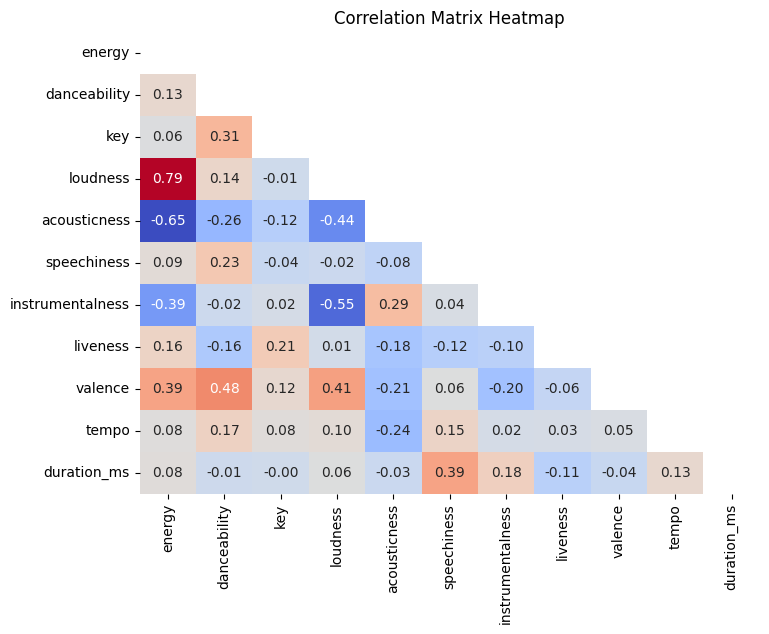

In [21]:
num_df = df_no_outliers[num_feat]
corr_matrix = num_df.corr()

mask = np.triu(np.ones_like(corr_matrix), k=0).astype(bool)

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix,mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=False)
plt.title('Correlation Matrix Heatmap')
plt.show()

To figure out correlation between different colums it's best to use heatmap for it so we could get a better view. 
To avoid mirrored heatmap we use mask that deletes the values above the diagonal line and the diagonal line itself.

## Possitive, negative and no correlation

In [22]:
cor_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
positive_corr = corr_matrix.where(cor_mask)

strong_positive_corr = positive_corr[positive_corr > 0.5].stack()

print("Strong positive correlations (correlation > 0.5):")
strong_positive_corr

Strong positive correlations (correlation > 0.5):


energy  loudness    0.79164
dtype: float64

In [23]:
negative_corr = corr_matrix.where(cor_mask)

strong_negative_corr = negative_corr[negative_corr < -0.5].stack()

print("Strong negative correlations (correlation > -0.5):")
print(strong_negative_corr)

Strong negative correlations (correlation > -0.5):
energy    acousticness       -0.654970
loudness  instrumentalness   -0.553735
dtype: float64


In [24]:
filtered_corr_matrix = corr_matrix.where(cor_mask)

no_corr_matrix = filtered_corr_matrix[abs(filtered_corr_matrix) < 0.15].stack()

print("Pairs of features with correlations below |0.15|:")
no_corr_matrix

Pairs of features with correlations below |0.15|:


energy            danceability        0.129809
                  key                 0.062428
                  speechiness         0.091874
                  tempo               0.075191
                  duration_ms         0.081971
danceability      loudness            0.144868
                  instrumentalness   -0.018348
                  duration_ms        -0.010983
key               loudness           -0.009178
                  acousticness       -0.121757
                  speechiness        -0.044544
                  instrumentalness    0.020802
                  valence             0.120007
                  tempo               0.080475
                  duration_ms        -0.003345
loudness          speechiness        -0.024341
                  liveness            0.010742
                  tempo               0.102097
                  duration_ms         0.064130
acousticness      speechiness        -0.080394
                  duration_ms        -0.032997
speechiness  

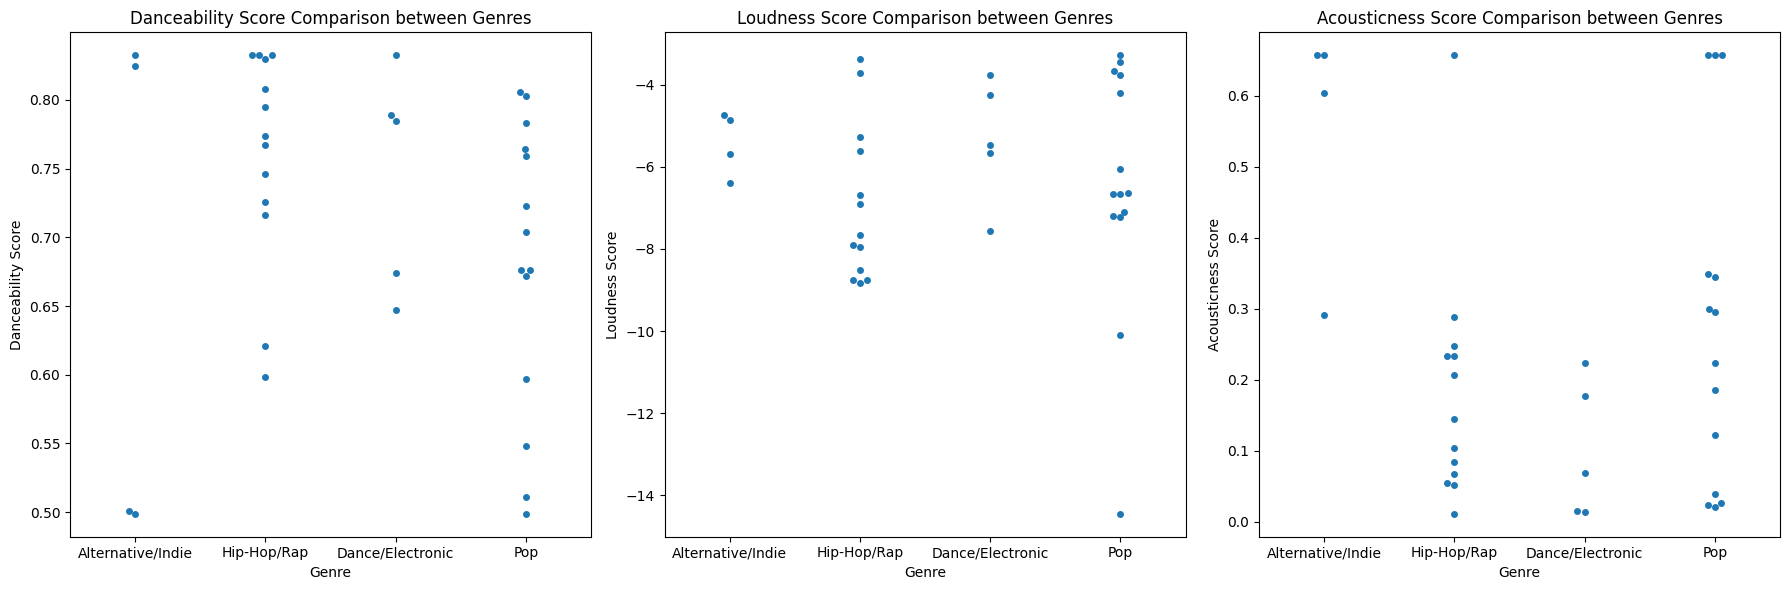

In [36]:
genres_of_interest = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']
df_filtered = df[df['genre'].isin(genres_of_interest)]

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.swarmplot(x='genre', y='danceability', data=df_filtered, ax=axes[0])
axes[0].set_title('Danceability Score Comparison between Genres')
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Danceability Score')

sns.swarmplot(x='genre', y='loudness', data=df_filtered, ax=axes[1])
axes[1].set_title('Loudness Score Comparison between Genres')
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('Loudness Score')

sns.swarmplot(x='genre', y='acousticness', data=df_filtered, ax=axes[2])
axes[2].set_title('Acousticness Score Comparison between Genres')
axes[2].set_xlabel('Genre')
axes[2].set_ylabel('Acousticness Score')

plt.tight_layout()
plt.show()

In [54]:
scores = ['danceability','loudness','acousticness']
mean_scores = df_filtered.groupby('genre')[scores].mean()
genre_counts = df_filtered.groupby('genre').size()
result = mean_scores.join(genre_counts.rename('count'))
result


,danceability,loudness,acousticness,count
genre,,,,
Alternative/Indie,0.664325,-5.421000,0.552210,4
Dance/Electronic,0.745504,-5.338000,0.099440,5
Hip-Hop/Rap,0.759889,-6.917846,0.183505,13
Pop,0.680056,-6.460357,0.278540,14


## Conclusions

There're 3 most popular artists: Billie Eilish, Dua Lipa, Travis Scott who all have 3 tracks in the top.

The most popular album "Future Nostalgia" was produced by Dua Lipa

32 tracks in the top have danceability score above 0.7 and none have a danceability score bellow 0.4, so it's clear that users tend to listen songs more if it's danceable.

There's 16 of unique genres in the top and the most popular genres are:

Pop: 14 tracks - it's noticeable that pop is a vague genre, so in future it might be worth to consider subgenres in the table for pop 
Hip-Hop/Rap: 13 tracks
Dance/Electronic: 5 tracks
Alternative/Indie: 4 tracks

Unsurprisingly loudness strongly correalates with energy, but since there are more loud tracks than silent ones in the top, so it would be worth considering to promote louder or more energetic tracks during ads, since they tend to catch more attention of users.

It also worth considering what tracks could be suggested for current users. We can see that Pop, Hip-hop and Dance/Electronic genres dominates in danceability and loudness, while Alternative/Indie tracks are focused on acousticness. So judging from genres and users preferences targeted suggestions could increase the satisfaction level of the user.

Suggestion for further data gathering: It might be beneficial to see at what time of the day the track was mostly listened to, since it could tell the appropiratness of the track. For example silent acoustic songs might be listened more during the evening and loud energetic songs during the day or late at night and that would also lead to more specified user targeting.